<h1>THE SPARKS FOUNDATION INTERNSHIP-</h1><h3>Data Science And Business Analytics</h3>
<h3>INTERN:- AYUSH MITRA</h3>




### TASK 1:- Prediction Using Supervised Machine Learning

### December Batch 2022

### Predicting the marks of the Student based on the Study hours(9.25 hrs)

=====================================================<b>THEORY</b>==========================================================

Supervised learning is the types of machine learning in which machines are trained using well "labelled" training data, and on basis of that data, machines predict the output. The labelled data means some input data is already tagged with the correct output.

In supervised learning, the training data provided to the machines work as the supervisor that teaches the machines to predict the output correctly. It applies the same concept as a student learns in the supervision of the teacher.

Supervised learning is a process of providing input data as well as correct output data to the machine learning model. The aim of a supervised learning algorithm is to find a mapping function to map the input variable(x) with the output variable(y).

In the real-world, supervised learning can be used for Risk Assessment, Image classification, Fraud Detection, spam filtering, etc.

======================================================<b>CODE</b>===========================================================

<p style="color:red;"><b>IMPORTING IMPORTANT LIBRARIES</b></p>

In [114]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
import plotly.express as px
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

<p style="color:red;"><b>IMPORTING DATA THROUGH URL</b></p>

In [63]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

In [64]:
stud_df=pd.read_csv(url)
print('DATA READING SUCESSFULL..........HAVE FUN EXPLORING!!!')

DATA READING SUCESSFULL..........HAVE FUN EXPLORING!!!


<p style="color:red;"><b>UNDERSTANDING AND EXPLORING THE DATA</b></p>

In [65]:
stud_df.shape

(25, 2)

In [66]:
stud_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [67]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [68]:
stud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [69]:
stud_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [93]:
stud_df.iplot()

In [71]:
fig=px.scatter(stud_df,x='Hours',y='Scores')
fig.update_layout(title_text='Scatter Plot ', title_x=0.5)
fig.show()

<p style="color:red;"><b>CREATING A SUPERVISED PREDICTION MODEL BASED ON THE  DATA</b></p>

In [72]:
#BREAKING THE DATASET INTO DEPENDENT VARIABLE AND INDEPENDENT VARIABLE
x= stud_df.iloc[:, :-1].values #INDEPENDENT VARIABLE  
y = stud_df.iloc[:, 1].values  #DEPENDENT VARIABLE

In [73]:
#BREAKING THE DATA INTO TEST AND TRAIN DATASETS
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=0) 

In [74]:
#OUR TRAIN AND TEST DATASET IS READY,NOW WE WILL CREATE A PREDICTIVE SUPERVISED REGRESSION MODEL
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print('TRAINING COMPLETE..............NOW MODEL IS READY FOR TESTING')

TRAINING COMPLETE..............NOW MODEL IS READY FOR TESTING


In [75]:
#CREATING THE REGRESSION LINE
reg_line = regressor.coef_*x+regressor.intercept_

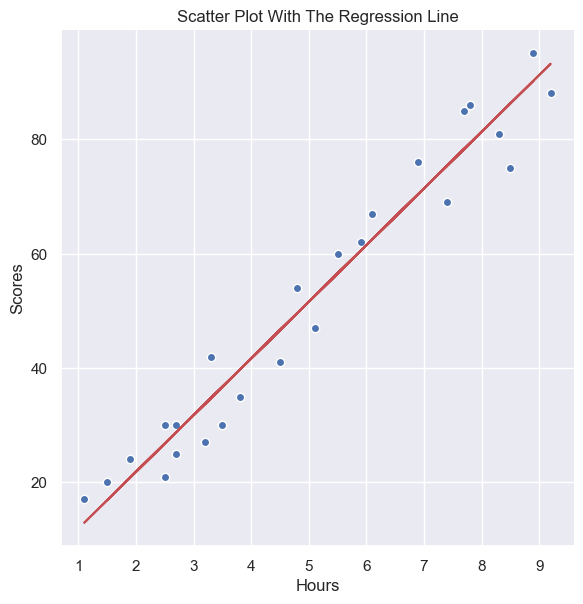

In [91]:
g = sns.FacetGrid(stud_df, height = 6)
g = g.map(plt.scatter, "Hours", "Scores", edgecolor="w").set(title='Scatter Plot With The Regression Line')
plt.plot(x, reg_line, color='r')
sns.set_theme()
sns.axes_style("whitegrid")

plt.show()

<p style="color:red;"><b>PREDICTING VALUES USING THE MODEL AND CHECKING ITS ACCURACY</b></p>

In [95]:
#USING THE X_TEST(IN HOURS) TO PREDICT SCORE(Y_PREDICT)
y_pred = regressor.predict(x_test) 

In [96]:
# Comparing Actual vs Predicted
pred_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [105]:
#FINDING THE PREDICTED OUTPUT OF THE GIVEN PROBELM:- Predicting the marks of the Student based on the Study hours(9.25 hrs)
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours: ",hours)
print('The Score: ',float(own_pred))

No of Hours:  9.25
The Score:  93.69173248737538


In [118]:
#CHECKING ITS ACCURACY
score=r2_score(y_test,y_pred)
print('r2 score is:  ',score)
print('mean_sqrd_error is: ',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('mean absolue error: ',mean_absolute_error(y_test, y_pred)) 

r2 score is:   0.9454906892105356
mean_sqrd_error is:  21.5987693072174
root_mean_squared error of is:  4.6474476121003665
mean absolue error:  4.183859899002975
